# Sistema masas-resortes


### Introducción

El problema mecánico mas simple, y que a la vez sirve como prototipo a problemas complejos como el de estructuras reticulares abordadas por el método de rigidez o a problemas del continuo resueltos por el método de los elementos finitos, es el de un sistema de masas acopladas por resortes y sometidas a la acción de fuerzas externas.

<center><img src="img/spring_system.png" alt="files" style="width:300px"></center>

Para resolver el sistema se proponen los diagramas de cuerpo libre de cada masa considerando las fuerzas ejercidas por cada uno de los resortes correspondientes. El sistema de ecuaciones del sistema en términos de fuerzas resulta ser indeterminado toda vez que se tendrán mas incogitas que ecuaciones. Para destruir esta indeterminación las fuerzas de cada resorte se escriben en términos de los desplazamientos de cada extremo utilizando las ecuaciones fuerza-desplazamiento escritas matricialmente como:


<center><img src="img/elemento.png" alt="files" style="width:300px"></center>


$$
    \begin{Bmatrix}
        f_1\\
        f_2
    \end{Bmatrix} =
    K\begin{bmatrix}
          1.0 & -1.0\\
        - 1.0 & 1.0
    \end{bmatrix}
    \begin{Bmatrix}
        u_1\\
        u_2
    \end{Bmatrix}
$$


En este notebook extenderemos el algoritmo de ensamblaje de ecuaciones de equilibrio global y resolveremos el problema completo. Además realizaremos algunas actividades que ayuden a asimilar los procedimientos asociados al ensamblaje de matrices globales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-success">
    
Complete esta rutina para que reciba como entrada el coeficiente de rigidez de un resorte y entregue como salida la matriz de rigidez del resorte.

</div>



In [2]:
def uel(k):
    
    kl = np.zeros([2 , 2])
    kl[0,0] = k
    kl[0,1] =-k
    kl[1,0] =-k
    kl[1,1] = k
        
    return kl

<div class="alert alert-success">
    
Convierta su código de ensamblaje (correspondiente al punto 1 de la tarea 1) en una función que reciba como paramétros de entrada:

* (i) el numero de elementos a ensamblar $numel$

* (ii) la matriz indicadora de ecuaciones $MIE()$

* (iii) el numero total de ecuaciones $neq$

* (iv) un arreglo con los coeficinetes de rigidez para cada resorte

y que entregue como resultado la matriz de rigidez global $K_G$.

</div>



In [12]:
def assembly(MIE , mats , numel , neq):
    
    KG = np.zeros([neq , neq] , dtype = float)
    mie = np.zeros([2] , dtype = int)
    
    ndof  = 2
    for i in range(numel):  # recorre los elementos
        k = mats[i]
        kl = uel(k)
        mie[:] = MIE[i , :]
        for irow in range(ndof):
            row = mie[irow]
            if row != -1:
                for icol in range(ndof):
                    col = mie[icol]
                    if col != -1:
                        KG[row , col] = KG[row , col] + kl[irow , icol]

    
    return KG

<div class="alert alert-success">
    
La función `solve` del modulo de algebra lineal `linalg` de `numpy` permite resolver sistemas de ecuaciones lineales de la forma:

$$[K_G]U = F$$

donde $U$ es un vector de incognitas, $F$ es el vector de terminos conocidos y $[K_G]$ es la matriz de coeficientes. El llamado a la función es de la forma:

`U = np.linalg.solve(KG, F)`

Formule un sistema simple de masas-resortes sometido a fuerzas externas y resuelvalo con la función `linalg`. Para resolver el problema genere la matriz de coeficientes con la rutina de ensamblaje. Los vectores de fuerzas y de coeficientes de resorte, así como la matriz indicadora de ecuaciones los puede crear directamente en el código.

</div>

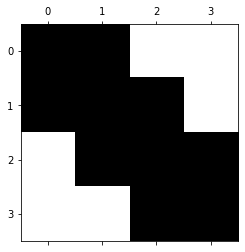

In [13]:
MIE = np.array([[-1 , 0],
                [ 0 ,  1],
                [ 1 ,  2],
                [ 2 ,  3]])
mats = np.array([ 1.0 , 2.0 , 1.0 , 3.0])  # Coeficientes de rigidez de cada resorte
F    = np.array([ 1.0 , 1.0 , 0.0 , 0.0])  # Vector de fuerzas aplicadas sobre las masas
#
numel = 4                      # Numero de resortes (elementos) en el sistema
neq   = 4                      # Numero de ecuaciones (grados de lbertad) del sistema
#
KG = assembly(MIE , mats , numel , neq)   # Ensamblaje de la matriz global
plt.spy(KG)

Resolvemos el sistema de ecuaciones

In [14]:
UG = np.linalg.solve(KG, F)  #Solución del sistema de ecuaciones
print(UG)

[2.  2.5 2.5 2.5]


## Problemas para la clase.

<div class="alert alert-success">


### Problema 1: Ensamblaje

* Enumere las "masas" (o desplazamientos globales). En los puntos correspondientes a una restricción asigne el identificador -1.

* Escriba la matriz indicadora de ecuaciones `MIE()`.

* En una hoja de papel esquematice la estructura de la matriz global.

* Verifique su respuesta al numeral anterior visualizando la matriz global calcualda con el programa y comente sus resultados.

</div>



### Ejemplo:


<center><img src="img/ejemplo.png" alt="files" style="width:300px"></center>

array([[ 2., -1.],
       [-1.,  1.]])

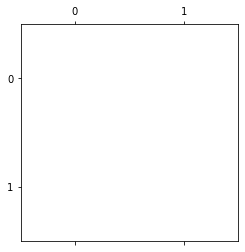

In [15]:
MIE = np.array([[-1 , 0],
                [ 0 ,  1]])
mats = np.array([ 1.0 , 1.0 ])  # Coeficientes de rigidez de cada resorte
KG = assembly(MIE , mats , numel = 2 , neq= 2)   # Ensamblaje de la matriz global
plt.spy(KG)
KG

<center><img src="img/resortes.png" alt="files" style="width:500px"></center>

<div class="alert alert-success">
    
### Problema 2: Ensamblaje inverso

Para cada uno de las siguientes matrices proponga un sistema de resortes valido:

$$ {MIE} = \left[ {\begin{array}{*{20}{c}}
0&1\\
{1}&-1\\
\end{array}} \right]$$


$$ {MIE} = \left[ {\begin{array}{*{20}{c}}
0&1\\
{1}&2\\
{0}&1\\
\end{array}} \right]$$

</div>

<div class="alert alert-success">

### Problema 3: Sistemas equivalentes

Utilizando las expresiones para resortes equivalntes en sistemas en serie y en paralelo dadas por:

$$\frac{1}{{{k_{eff}}}} = \frac{1}{{{k_1}}} + \frac{1}{{{k_2}}}$$

y

$${k_{eff}} = {k_1} + {k_2}$$

respectivamente, determinar el sistema equivalente compuesto por un solo resorte en cada uno de los sistemas de la figura. Verifique sus resultados resolviendo ambos sistemas con el programa.

<center><img src="img/resortes.png" alt="files" style="width:500px"></center>



</div>

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'estilo.css'
HTML(open(css_file, "r").read())